In [1]:
import numpy as np
import pandas as pd

## **데이터 로드 및 개형 확인**

In [2]:
#데이터 로드
df = pd.read_csv('vgames2.csv')

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df.shape

(16598, 10)

In [4]:
#형 확인
df = pd.DataFrame(df)
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [5]:
#컬럼별 결측치의 수 확인: 
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
#unnamed:0을 자름 
df = df.loc[:, 'Name':'Other_Sales']
df.shape

(16598, 9)

In [7]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [8]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## **결측치 확인 및 보완**

## **데이터 클렌징**

**판매량 단위수 통일**

1) K, M, B의 존재 확인

In [9]:
NA_millionsales = df['NA_Sales'].str.contains("M")
NA_millionsales = df[NA_millionsales]
NA_millionsales
#지역 컬럼과 숫자값을 바꿔주며 확인 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


10억장 이상(B) 팔린 타이틀은 존재하지 않는 것으로 확인.
K, M에 대해서만 수치형으로의 변환 작업을 결정하였다. 
이때, 자릿수가 기재되어 있지 않은 숫자의 경우 기본 단위를 M으로 산정하였다.

2) 함수 작성

In [10]:
#모든 데이터에 M을 추가
df['NA_Sales'] = df['NA_Sales']+'M'
df['JP_Sales'] = df['JP_Sales']+'M'
df['EU_Sales'] = df['EU_Sales']+'M'
df['Other_Sales'] = df['Other_Sales']+'M'

In [11]:
df.sort_values('NA_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9416,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9M,6.18M,7.2M,0.71M
13057,Mark Davis Pro Bass Challenge,PS2,2002.0,Sports,Natsume,90KM,0.07M,0M,0.02M
13798,King of Clubs: Mini Golf,Wii,2008.0,Sports,Oxygen Interactive,90KM,0M,0M,0.01M
14347,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90KM,0M,0M,0.01M
10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81M,7.57M,4.13M,1.92M
...,...,...,...,...,...,...,...,...,...
7544,Rave Master: Special Attack Force!,GBA,2002.0,Fighting,Konami Digital Entertainment,0.01M,0M,0MM,0M
11876,Rocket League,PC,2016.0,Sports,505 Games,0.01M,0.01M,0M,0M
3131,Call of Duty: Modern Warfare 2,PC,2009.0,Shooter,Activision,0.01M,0.79MM,0M,0.09M
3138,Batman: A Telltale Game Series,PS4,2016.0,Adventure,Telltale Games,0.01M,0.02M,0M,0.01M


In [12]:
df['NA_Sales'] = df['NA_Sales'].map(lambda x : x.replace('KM','K'))
df['NA_Sales'] = df['NA_Sales'].map(lambda x : x.replace('MM','M'))

df['JP_Sales'] = df['JP_Sales'].map(lambda x : x.replace('KM','K'))
df['JP_Sales'] = df['JP_Sales'].map(lambda x : x.replace('MM','M'))

df['EU_Sales'] = df['EU_Sales'].map(lambda x : x.replace('KM','K'))
df['EU_Sales'] = df['EU_Sales'].map(lambda x : x.replace('MM','M'))

df['Other_Sales'] = df['Other_Sales'].map(lambda x : x.replace('KM','K'))
df['Other_Sales'] = df['Other_Sales'].map(lambda x : x.replace('MM','M'))

In [13]:
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [14]:
#K값이 포함된 데이터가 잘 변환되었는지 확인.
df.iloc[13057]

Name           Mark Davis Pro Bass Challenge
Platform                                 PS2
Year                                    2002
Genre                                 Sports
Publisher                            Natsume
NA_Sales                               90000
EU_Sales                               70000
JP_Sales                                   0
Other_Sales                            20000
Name: 13057, dtype: object

## **데이터 추가**

1. total_Sales: 전세계 판매량 컬럼을 추가하기 위해 컬럼값을 합산

In [15]:
df['total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.sort_values('total_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
...,...,...,...,...,...,...,...,...,...,...
14265,Nitroplus Blasterz: Heroines Infinite Duel,PS3,2015.0,Fighting,Nitroplus,0,0,10000,0,10000
2311,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,2009.0,Adventure,CyberFront,0,0,10000,0,10000
11376,Rail Simulator,PC,2007.0,Simulation,Electronic Arts,0,10000,0,0,10000
3571,Hyperdimension Neptunia mk2,PS3,2011.0,Action,Nippon Ichi Software,0,10000,0,0,10000


2. Consoles: Platform 컬럼의 값을 가정용 콘솔(housing), 휴대형 콘솔(Handheld), PC의 세 가지로 그루핑. 

In [28]:
#플랫폼 그루핑 함수 작성

def cons(x) :
  if x == 'PC' : 
    return x
  elif x == 'GBA' or x == 'PSP' or x == '3DS' or x == 'DS' or x == 'PSV'or x == '3DS'or x == 'GB' or x == 'GG' or x == 'WS' :
    return "Handheld"
  else :
    return "Housing"

df["Consoles"] = df["Platform"].apply(lambda x : cons(x))
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000,0,0,0,40000,Handheld
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000,0,0,10000,180000,Housing
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20000,0,20000,Handheld
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000,0,0,0,40000,Handheld
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000,90000,0,40000,250000,Housing
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000,40000,0,10000,200000,Housing
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000,0,0,0,10000,Handheld
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000,190000,30000,130000,790000,Housing
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000,50000,250000,30000,380000,Handheld


## **결측치 수정**

Name: 0, Platform: 0, Year: 271, Genre: 50, Publisher: 58의 결측치 존재

이 중 Year과 Genre를 우선적으로 채워보고자 함 

In [17]:
#형변환
df['Year'] = df['Year'].astype(float)

In [18]:
#연도를 4자리수로 통일하는 함수 작성
def cont_year(x): 
  if (x <= 21) :
    x += 2000
    return x
  elif (x > 21) & (x < 100):
    x += 1900
    return x
  else:
    return x

In [19]:
#함수 적용
df['Year'] = df['Year'].apply(cont_year)

In [20]:
#출시연도가 최근인 순으로 정렬
df.sort_values('Year', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,270000,0,0,20000,290000,Handheld
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,30000,0,30000,Housing
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,10000,0,10000,Handheld
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,10000,0,10000,Handheld
14981,Dragon Quest Builders: Revive Alefgard,PSV,2016.0,Role-Playing,Square Enix,0,0,300000,0,300000,Handheld
...,...,...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,10000,0,0,0,10000,Housing
16275,Space Invaders,2600,NaN,Shooter,Atari,2360000,140000,0,30000,2530000,Housing
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,700000,0,0,50000,750000,Housing
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,60000,0,0,0,60000,Housing


1. Genre

현재 데이터에 존재하는 장르의 종류를 확인하여 결측치들을 모두 이미 존재하는 종류 안에서 분류하기로 함 

In [21]:
#1. 장르가 결측된 row 확인
nullgenre = df[df['Genre'].isnull()]

In [22]:
nullgenre .sort_values('total_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000,4050000,4340000,790000,14350000,Handheld
4598,Wii Party,Wii,2010.0,NaN,Nintendo,1790000,3530000,2490000,680000,8490000,Housing
9488,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1880000,0,2330000,1740000,5950000,Housing
12331,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,990000,480000,1090000,140000,2700000,Housing
15526,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1000000,760000,260000,360000,2380000,Housing
16587,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1380000,800000,0,100000,2280000,Housing
5668,Chrono Cross,PS,1999.0,NaN,SquareSoft,620000,420000,690000,120000,1850000,Housing
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1100000,60000,0,180000,1340000,Housing
11063,Yakuza 3,PS3,2009.0,NaN,Sega,210000,210000,620000,80000,1120000,Housing
11496,F-Zero X,N64,1998.0,NaN,Nintendo,450000,330000,290000,30000,1100000,Housing


결측치 수작업 변환 전에 여기까지 작업한 데이터프레임을 csv로 백업하였음

In [23]:
df.to_csv("df.csv", mode='w')
df = pd.read_csv("df.csv")
df = df.loc[:, 'Name':'total_Sales']

In [24]:
#구글링을 통한 수작업
df.loc[df['Name'] == 'Ape Escape: On the Loose', ('Genre')] = 'Platform'

In [25]:
df.sort_values('Year', ascending=True).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
9226,Bridge,2600,1980.0,Misc,Activision,250000,20000,0,0,270000
5723,Asteroids,2600,1980.0,Shooter,Atari,4000000,260000,0,50000,4310000
14264,Boxing,2600,1980.0,Fighting,Activision,720000,40000,0,10000,770000
12314,Ice Hockey,2600,1980.0,NaN,Activision,460000,30000,0,10000,500000
5938,Kaboom!,2600,1980.0,Misc,Activision,1070000,70000,0,10000,1150000
10121,Defender,2600,1980.0,Misc,Atari,990000,50000,0,10000,1050000
15012,Missile Command,2600,1980.0,Shooter,Atari,2560000,170000,0,30000,2760000
13133,Freeway,2600,1980.0,Action,Activision,320000,20000,0,0,340000
7317,Checkers,2600,1980.0,Misc,Atari,220000,10000,0,0,230000
13452,Donkey Kong,2600,1981.0,Platform,Coleco,1360000,80000,0,20000,1460000


2. 연도 결측치

In [26]:
#2. 출시연도가 결측된 row 확인, 새로운 데이터프레임으로 저장
yeardf = df[df['Year'].isnull()] 

#전세계 판매량 최상위 20작품을 확인
yeardf.sort_values('total_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
6949,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4260000,260000,10000,710000,5240000
10965,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,590000,2360000,40000,510000,3500000
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1860000,1020000,0,290000,3170000
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1570000,1020000,0,410000,3000000
16275,Space Invaders,2600,NaN,Shooter,Atari,2360000,140000,0,30000,2530000
31,Rock Band,X360,NaN,Misc,Electronic Arts,1930000,340000,0,210000,2480000
13327,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2150000,180000,0,70000,2400000
8529,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1540000,630000,0,220000,2390000
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1190000,840000,0,230000,2260000
4181,Rock Band,Wii,NaN,Misc,MTV Games,1350000,560000,0,200000,2110000


**기본 통계값 확인**

In [29]:
consoles = df.groupby(df['Consoles'])
consoles.mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
Consoles,,,,,,
Handheld,2008.231530,171603.827177,88195.215311,96570.334737,26742.583541,383111.960766
Housing,2005.267918,326806.874484,176090.462787,75508.498800,60804.762989,639210.599059
PC,2008.773065,97166.664583,145499.998958,177.083333,25895.833333,268739.580208


In [30]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
count,16327.000000,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04
mean,2006.406443,2.646674e+05,1.466520e+05,7.778166e+04,4.806302e+04,5.371641e+05
std,5.828981,8.166830e+05,5.053512e+05,3.092906e+05,1.885884e+05,1.555151e+06
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,1.700000e+05
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04,4.700000e+05
max,2020.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07,8.274000e+07


2000년대 후반의 데이터가 가장 많은 것을 확인할 수 있음 

**상관계수 확인**

Q. 전세계 판매량 추이와 가장 유사한 판매량 추이를 보이는 지역은 어디일까? 

In [31]:
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074714
NA_Sales,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941050
EU_Sales,0.006014,0.767727,1.000000,0.435584,0.726385,0.902839
JP_Sales,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611821
Other_Sales,0.041058,0.634737,0.726385,0.290186,1.000000,0.748351
total_Sales,-0.074714,0.941050,0.902839,0.611821,0.748351,1.000000


미국과 유럽의 판매량 추이가 각각 0.94, 0.90으로 전세계 판매량 추이와 높은 상관관계를 보이고 있음. 
한편 일본에서의 판매량 추이는 타 지역 또는 전체 판매량과 비교했을 때 상대적으로 독립적인 경향성을 보임

**1. 지역에 따라서 선호하는 게임 장르가 다를까?**

Genre-Sales

**2. 연도별 게임의 트렌드가 존재할까?**

이상의 질문에 대한 대답으로 두 가지를 생각해볼 수 있음:

1. Year-Gerne
2. Year-Platform

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn')
#sns.set(font_scale=0.7) 

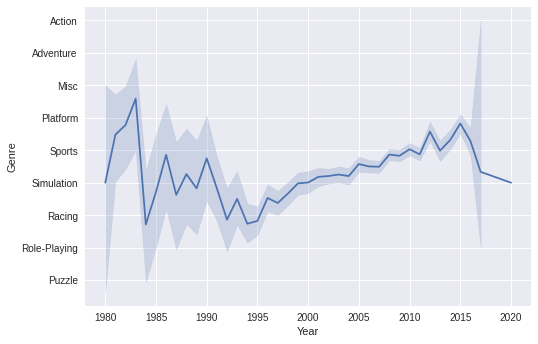

In [33]:
#2. Year-Platform
sns.lineplot(x=df['Year'], y=df['Genre'])
plt.show()

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

1. 지역별 출고량 상위 20작품의 장르, 플랫폼, 발매연도를 확인해 의미를 도출
2. total_Sales 상위 20작품에 대해 같은 작업

In [34]:
#1. 지역별 출고량 상위 10작품을 확인
df.sort_values('NA_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,Housing
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,Housing
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000,630000,280000,470000,28310000,Housing
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,Handheld
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,Housing
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,Housing
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000,21820000,Housing
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,Housing
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,Housing
13111,Super Mario World,SNES,1990.0,Platform,Nintendo,12780000,3750000,3540000,550000,20620000,Housing


In [35]:
df.sort_values('JP_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,Handheld
9416,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9000000,6180000,7200000,710000,23090000,Handheld
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,Housing
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,Handheld
10555,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6420000,4520000,6040000,1370000,18350000,Handheld
10621,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5570000,3280000,5650000,820000,15320000,Handheld
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6060000,3900000,5380000,500000,15840000,Handheld
3273,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2550000,3520000,5330000,880000,12280000,Handheld
511,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3440000,5360000,5320000,1180000,15300000,Handheld
1847,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0,0,4870000,0,4870000,Handheld


In [36]:
df.sort_values('EU_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,Housing
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,Housing
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,Housing
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9070000,11000000,1930000,2750000,24750000,Handheld
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999,Housing
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4750000,9260000,4160000,2049999,20219999,Handheld
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,Handheld
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,Housing
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,Handheld
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9090000,8590000,2530000,1790000,22000000,Housing


In [37]:
df.sort_values('Other_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
14669,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430000,400000,410000,10570000,20810000,Housing
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,Housing
14665,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3010000,10000,1100000,7530000,11650000,Housing
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999,Housing
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,Housing
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,Housing
8213,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,50000,0,640000,2930000,3620000,Housing
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,Handheld
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,Housing
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9070000,11000000,1930000,2750000,24750000,Handheld


In [38]:
df.sort_values('total_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,Housing
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,Housing
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,Housing
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,Housing
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,Handheld
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,Handheld
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,Handheld
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,Housing
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,Housing
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000,630000,280000,470000,28310000,Housing


In [39]:
totalsales=pd.DataFrame(df.sort_values('total_Sales', ascending=False).head(20))
totalsales.sort_values('Year', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales,Consoles
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999,Housing
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000,21820000,Housing
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,Housing
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,Housing
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9090000,8590000,2530000,1790000,22000000,Housing
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,Housing
3435,Wii Fit,Wii,2007.0,Sports,Nintendo,8940000,8029999,3600000,2150000,22719999,Housing
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,Housing
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,Handheld
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,Housing


#**시각화**

1. 라이브러리 로드: matplotlib and seaborn

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn')
#sns.set(font_scale=0.7) 

2. pairplot

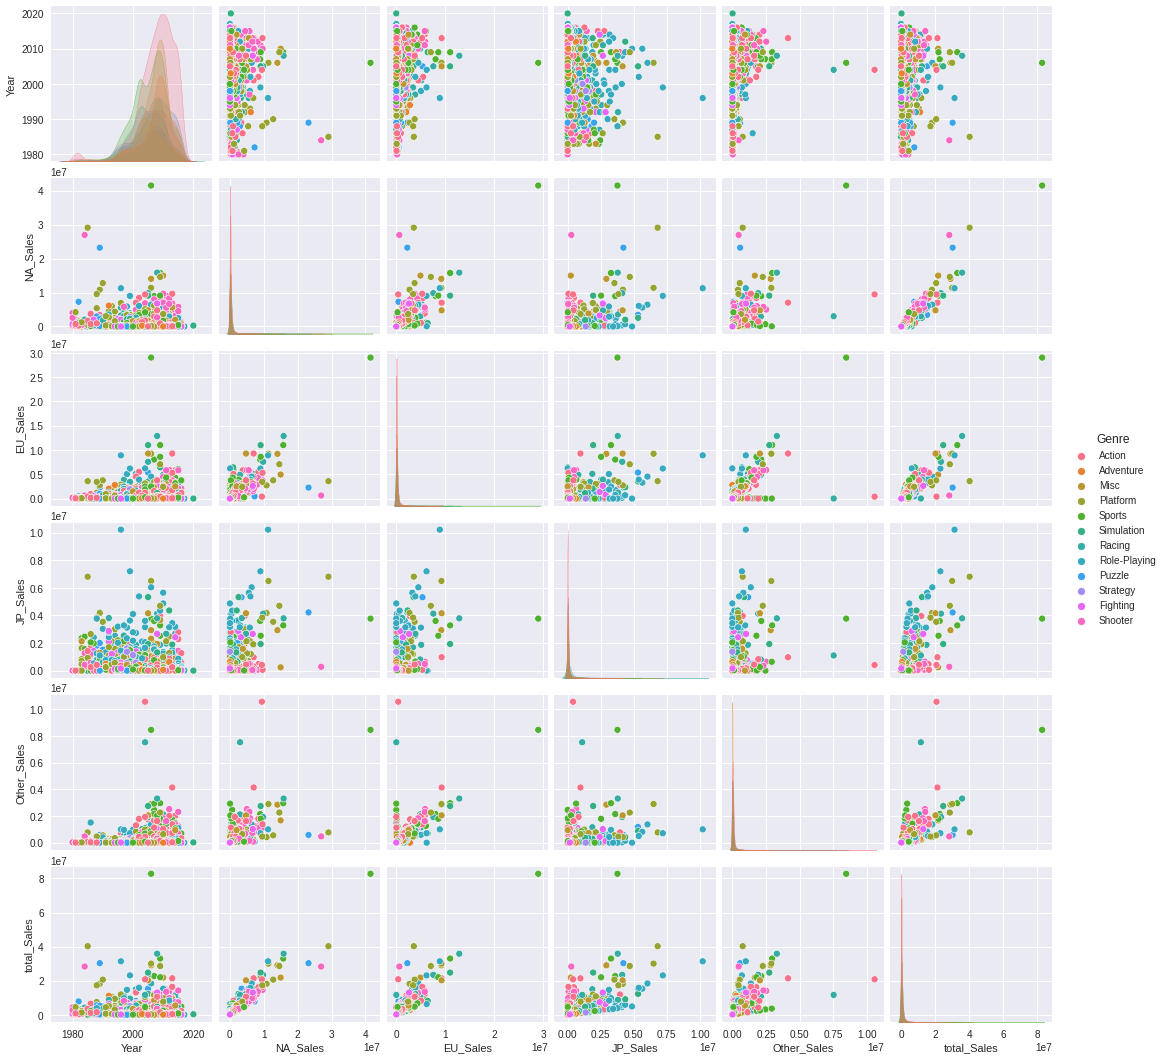

In [41]:
sns.pairplot(df, hue="Genre")
plt.show()

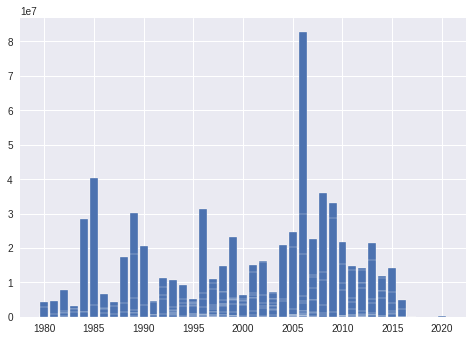

In [42]:
plt.bar(df['Year'], df['total_Sales'])
plt.show()

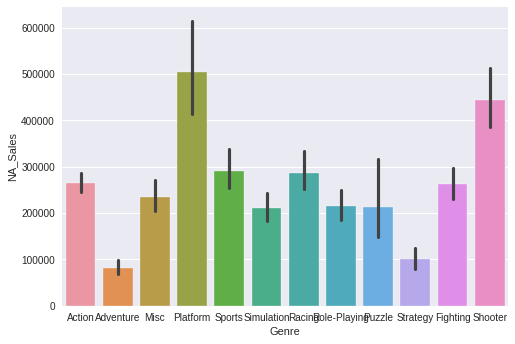

In [43]:
sns.barplot(x="Genre", y="NA_Sales", data=df)
plt.show()

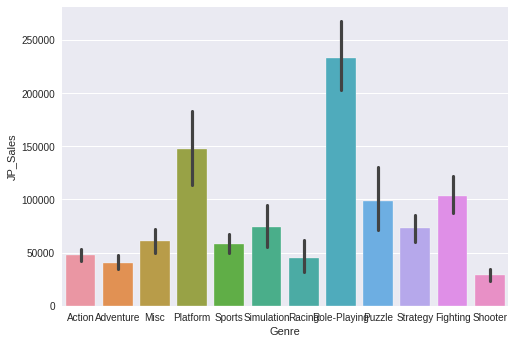

In [44]:
sns.barplot(x="Genre", y="JP_Sales", data=df)
plt.show()

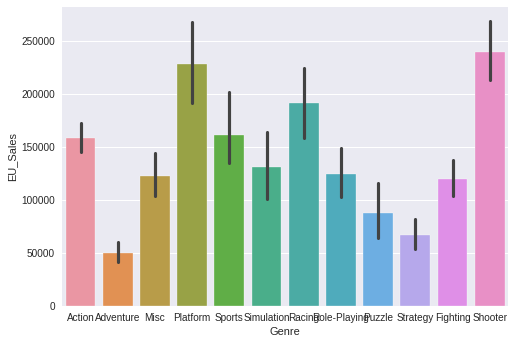

In [45]:
sns.barplot(x="Genre", y="EU_Sales", data=df)
plt.show()

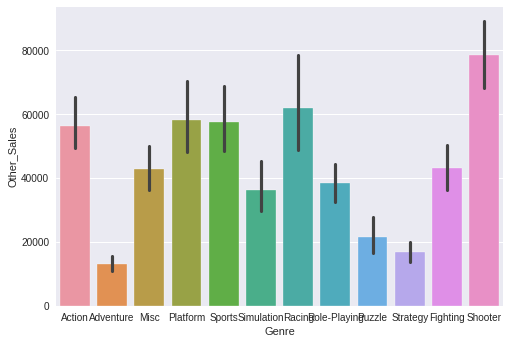

In [46]:
sns.barplot(x="Genre", y="Other_Sales", data=df)
plt.show()

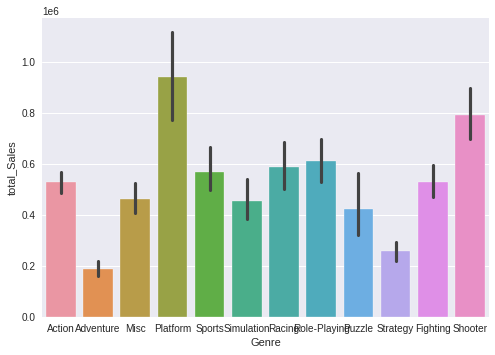

In [47]:
sns.barplot(x="Genre", y="total_Sales", data=df)
plt.show()

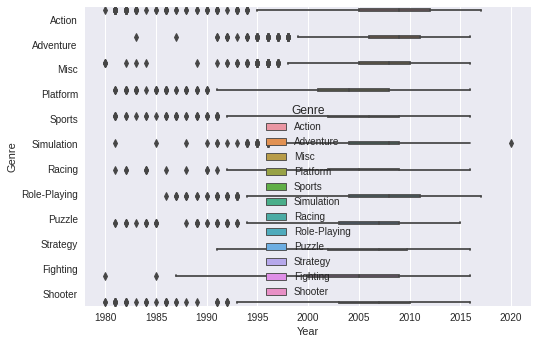

In [48]:
sns.boxplot(x="Year", y="Genre", hue="Genre", data=df)
plt.rcParams["figure.figsize"] = (19.20, 10.80)
plt.show()

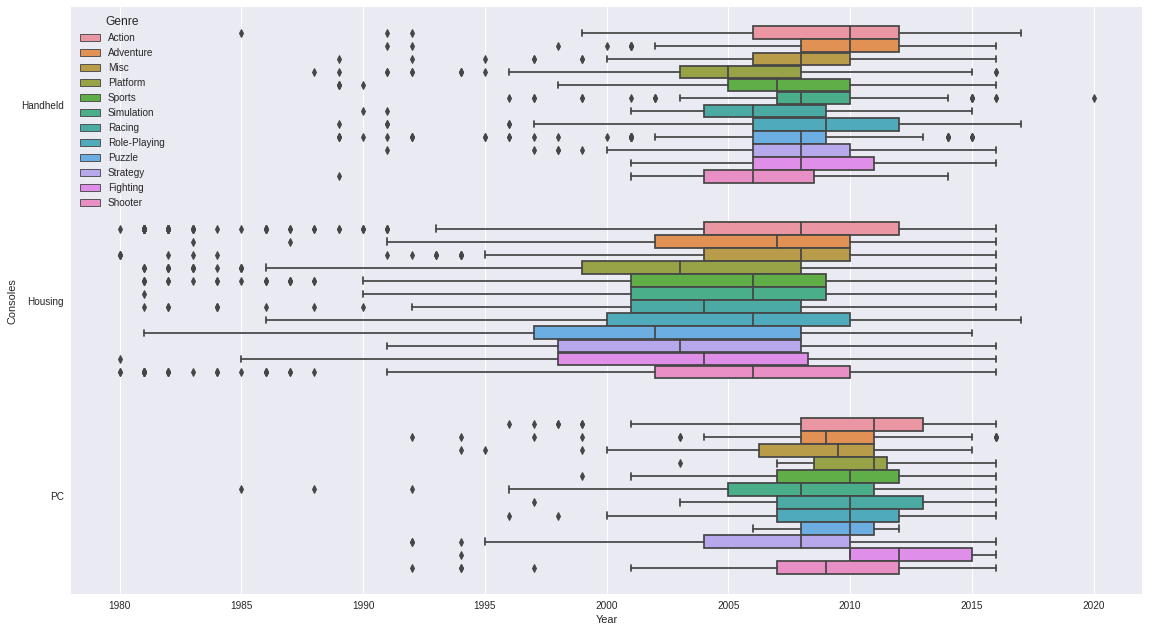

In [49]:
sns.boxplot(x="Year", y="Consoles", hue="Genre", data=df)
plt.rcParams["figure.figsize"] = (19.20, 10.80)
plt.show()

##시기별 각 지역에서의 출고수량(그루핑 이전)##

유의미한 차이는 없어 보이나 일본에서의 콘솔 출고량이 늘 높은 것을 알 수 있음

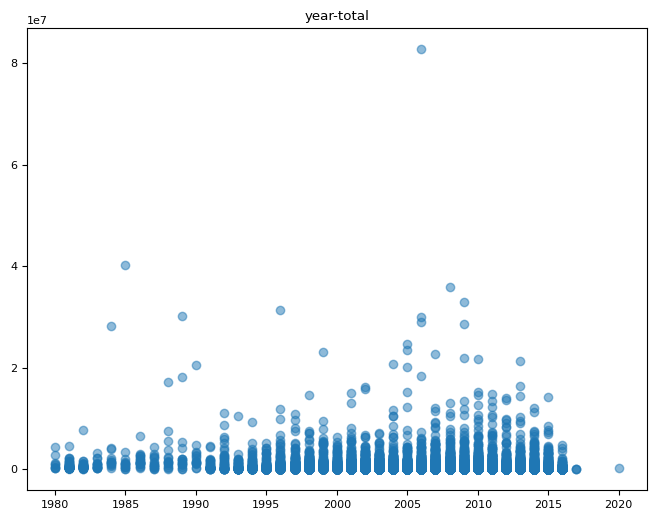

In [65]:
plt.scatter(df['Year'], df['total_Sales'], alpha=0.5)
plt.title("year-total")
plt.show()

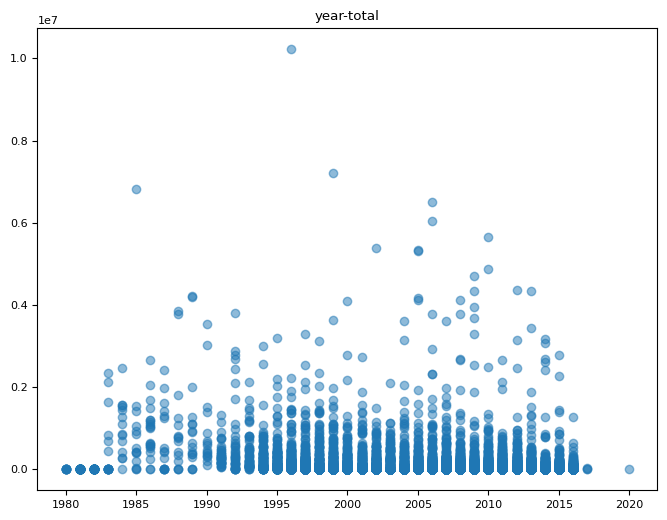

In [66]:
plt.scatter(df['Year'], df['JP_Sales'], alpha=0.5)
plt.title("year-total")
plt.show()

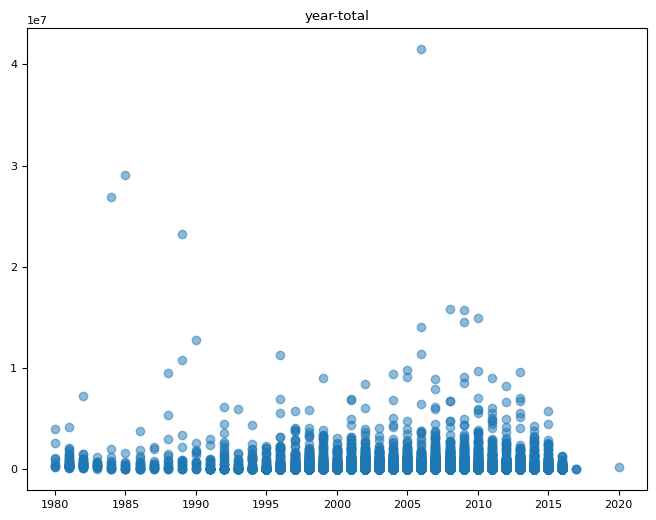

In [67]:
plt.scatter(df['Year'], df['NA_Sales'], alpha=0.5)
plt.title("year-total")
plt.show()

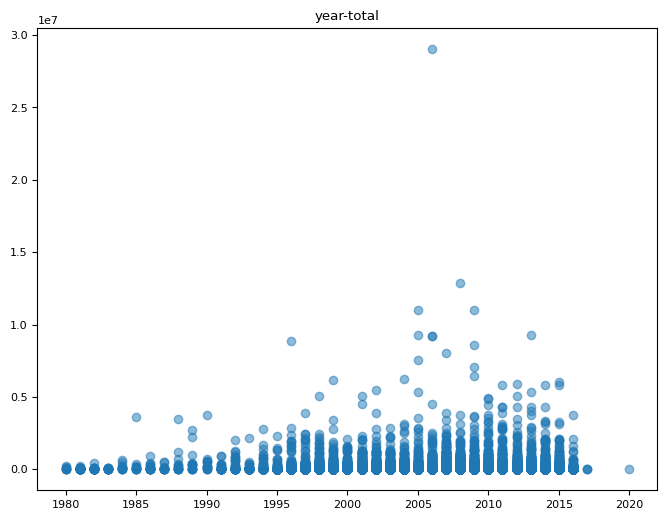

In [68]:
plt.scatter(df['Year'], df['EU_Sales'], alpha=0.5)
plt.title("year-total")
plt.show()

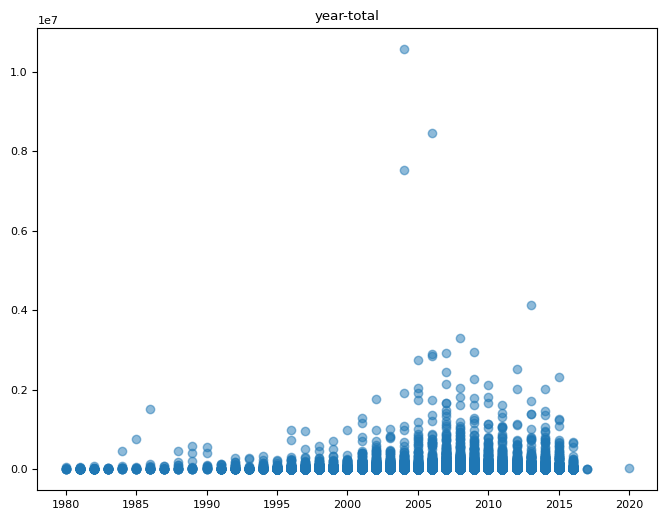

In [69]:
plt.scatter(df['Year'], df['Other_Sales'], alpha=0.5)
plt.title("year-total")
plt.show()

## 지역별 출고수량에 대한 박스플롯

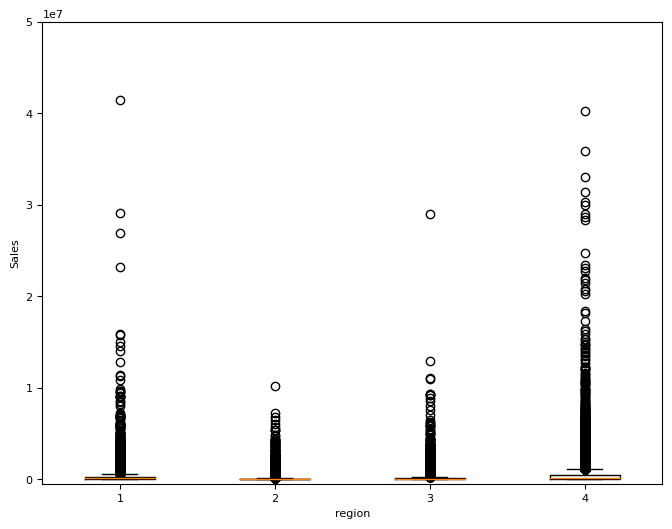

In [55]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([df['NA_Sales'], df['JP_Sales'], df['EU_Sales'], df['total_Sales']])
ax.set_ylim(-500000, 50000000.0)
ax.set_xticks([1, 2, 3, 4])
ax.set_xlabel('region')
ax.set_ylabel('Sales')

plt.show()


***지금 할 필요 없음***
------


In [56]:
label = df['Platform'].unique()

In [57]:
platform = df['Platform'].value_counts() 

In [58]:
genre = df['Genre'].unique()
genre

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [59]:
genrenum = df['Genre'].value_counts()
genrenum

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         885
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [61]:
con = df['Consoles'].unique()

In [62]:
housing = df['Consoles'].value_counts() 

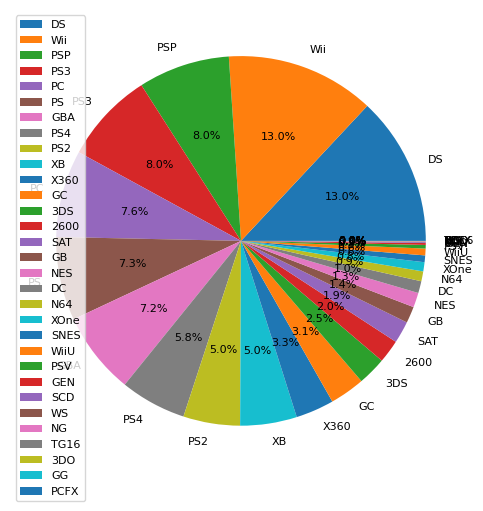

In [63]:
plt.pie(platform, labels=label, autopct='%.1f%%')
plt.legend(label)
plt.show()

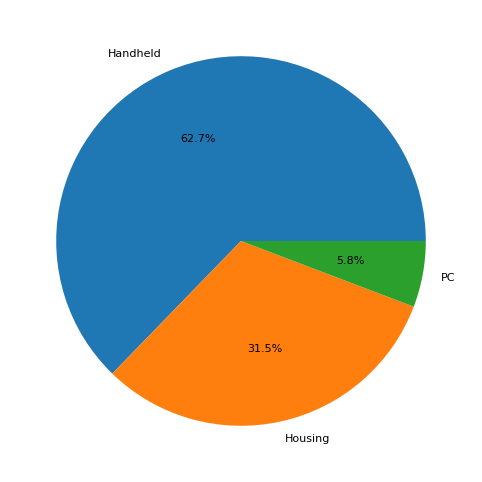

In [64]:
plt.pie(housing, labels=con, autopct='%.1f%%')
plt.show()